In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [3]:
train_original=train.copy()

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

test_original=test.copy()

In [7]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


# Data Pre-processing

## 1) Combine train and test dataset

In [8]:
combine=pd.concat([train,test],axis=0)

In [9]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [10]:
combine.tail()

,id,label,tweet
17192,49155,NaN,thought factory: left-right polarisation! #tru...
17193,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
17194,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,NaN,"happy, at work conference: right mindset leads..."
17196,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


## 2) Removing Twitter handles (@user) from the tweets

In [11]:
import re

In [12]:
def remove(text,pattern):
    match=re.findall(pattern,text)
    
    for i in match:
        text=text.replace(i,"")
    return text

In [13]:
combine['tweets_org']=np.vectorize(remove)(combine['tweet'],r"@[\w]*")

In [14]:
combine.head()

,id,label,tweet,tweets_org
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## 3) Removing Punctuations, numbers and special characters

In [15]:
combine['tweets_org']=combine['tweets_org'].str.replace(r'[^A-Za-z#]'," ")

<ipython-input-15-05ea53e2c775>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['tweets_org']=combine['tweets_org'].str.replace(r'[^A-Za-z#]'," ")


In [16]:
combine.head()

,id,label,tweet,tweets_org
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


## 4) Removing short words

In [17]:
def remove_short_words(text):
    temp=text.split()
    ans=""
    for i in temp:
        if len(i)>3:
            ans+=" "+i
    return ans

In [18]:
combine['tweets_org']=combine['tweets_org'].apply(remove_short_words)

In [19]:
combine.head(10)

,id,label,tweet,tweets_org
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids ...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelcha...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos dis...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


## 5) Making list of words of tweets and stemming

In [20]:
tokenized_tweets= combine['tweets_org'].apply(lambda x: x.split())
tokenized_tweets.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tweets_org, dtype: object

In [21]:
import nltk

In [22]:
from nltk.stem import PorterStemmer

In [23]:
def stemming_words(text):
    st=PorterStemmer()
    for i in range(len(text)):
        text[i]=st.stem(text[i])
        
    return text

In [24]:
tokenized_tweets=tokenized_tweets.apply(stemming_words)

In [25]:
tokenized_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tweets_org, dtype: object

In [26]:
def stitch_back(text):
    text=' '.join(text)
    
    return text

In [27]:
tokenized_tweets=tokenized_tweets.apply(stitch_back)

In [28]:
tokenized_tweets.head()

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit caus they offer wheelchair ...
2                                  bihday your majesti
3                           #model love take with time
4                             factsguid societi #motiv
Name: tweets_org, dtype: object

In [29]:
combine['tweets_org']=tokenized_tweets
combine.head()

,id,label,tweet,tweets_org
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


# Data Visualisation

In [30]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

## Generating WordCloud for tweets with label ‘0’

In [31]:
all_positive_words=' '.join(text for text in combine['tweets_org'][combine['label']==0])

In [32]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
word_cloud=WordCloud(height=800,width=800,stopwords=stop_words,min_font_size=10,background_color="white").generate(all_positive_words)

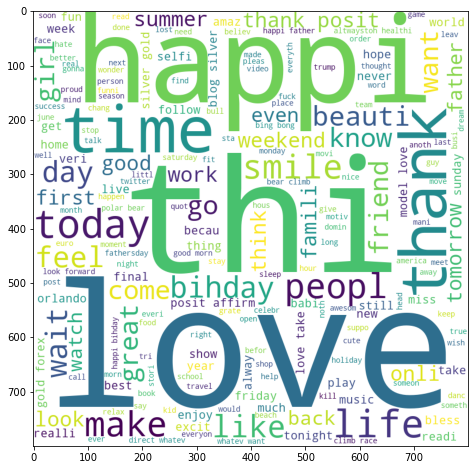

In [33]:
plt.figure(figsize=(8,8))
plt.imshow(word_cloud)
 
plt.show()

In [34]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

In [35]:
image_colors = ImageColorGenerator(Mask)

In [36]:
wordcloud=WordCloud(background_color="black",height=1500,width=4000,mask=Mask).generate(all_positive_words)

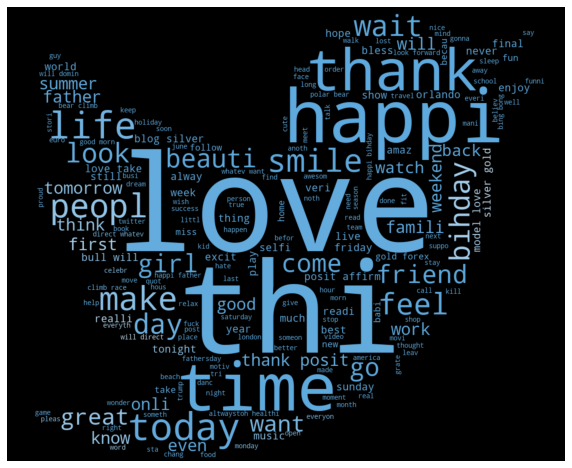

In [37]:
plt.figure(figsize=(10,20))

plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation="hamming")
plt.axis("off")
plt.show()

## Generating WordCloud for tweets with label ‘1’

In [38]:
all_negative_words=' '.join(text for text in combine['tweets_org'][combine['label']==1])

In [39]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

In [40]:
wc=WordCloud(background_color="black",height=1500,width=4000,mask=Mask,color_func=image_colors).generate(all_negative_words)

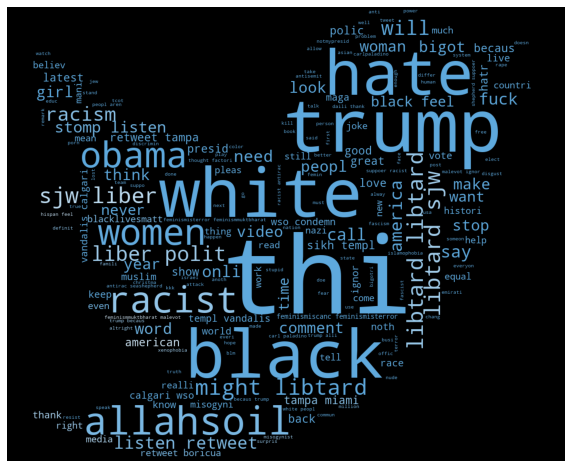

In [41]:
plt.figure(figsize=(10,20))

plt.imshow(wc)
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

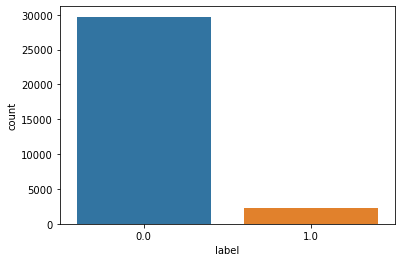

In [42]:
sns.countplot(data=train_original,x=combine['label'])

## Impact of hashtags on tweet sentiment

In [43]:
def hashtags_extract(text):
    hashtags=[]
    for i in text:
        hashtags.append(re.findall(r'#(\w+)',i))
    
    return hashtags

### A nested list of all the hashtags from the positive reviews from the dataset.

In [44]:
ht_positive=hashtags_extract(combine['tweets_org'][combine['label']==0])

In [45]:
#ht_positive

In [46]:
ht_positive_unnest = sum(ht_positive,[])

In [47]:
len(ht_positive_unnest)

68425

### A nested list of all the hashtags from the negative reviews from the dataset

In [48]:
ht_negative=hashtags_extract(combine[combine['label']==1]['tweets_org'])

In [49]:
ht_negative_unnest=sum(ht_negative,[])

In [50]:
#ht_negative_unnest

In [51]:
from collections import Counter
words_freq_positive=Counter(ht_positive_unnest)

In [52]:
#words_freq_positive

In [53]:
df_positive=pd.DataFrame({'Hashtags':list(words_freq_positive.keys()),'Count':list(words_freq_positive.values())})
df_positive.head()

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


In [54]:
df_positive_plot=df_positive.sort_values('Count',ascending=False)[0:20]

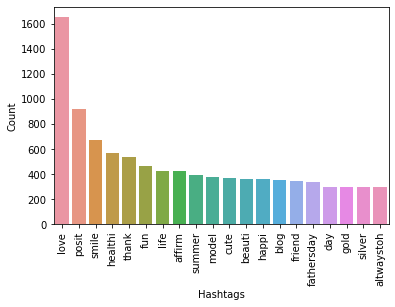

In [55]:
sns.barplot(data=df_positive_plot,x='Hashtags',y="Count")
plt.xticks(rotation=90);

In [56]:
words_freq_negative=Counter(ht_negative_unnest)

In [57]:
df_negative=pd.DataFrame({'Hashtags':list(words_freq_negative.keys()),'Count':list(words_freq_negative.values())})

In [58]:
df_negative_plot=df_negative.sort_values('Count',ascending=False)[0:20]

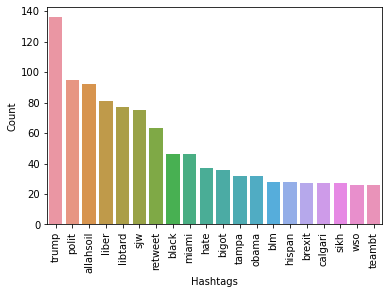

In [59]:
sns.barplot(data=df_negative_plot,x='Hashtags',y='Count')
plt.xticks(rotation=90);

# Extracting Features from cleaned Tweets

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer

## Bag-of-Words Features

In [61]:
bow_vectorizer=CountVectorizer(max_df=0.9,min_df=2,stop_words='english',max_features=1000)

In [62]:
bow=bow_vectorizer.fit_transform(combine['tweets_org'])

In [63]:
df_bow=pd.DataFrame(bow.todense())

In [64]:
df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF Features

In [65]:
tfidf=TfidfVectorizer(max_df=0.9,min_df=2,stop_words='english')

In [66]:
tfidf_matrix=tfidf.fit_transform(combine['tweets_org'])

## Splitting our dataset into Training and Validation Set

In [67]:
train_tfidf_matrix=tfidf_matrix[:31962]

In [68]:
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Splitting the data into train and validation set

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_valid, y_train, y_valid = train_test_split(train_tfidf_matrix,train['label'], test_size=0.2, random_state=101)

#### Use different models to see which best fits our dataset and then we use that model for predicting results on the test data.

Here we will use 5 different models:
    
1. Logistic Regression
2. Decision Trees
3. RandomForest Classifier
4. Naive Bayes
5. Adaboost

In [71]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=1000,solver="lbfgs")
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_model=DecisionTreeClassifier()

param_grid={'max_features':['log2','sqrt',0.3]}
dt_model_grid=GridSearchCV(dt_model,param_grid)

dt_model_grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_features': ['log2', 'sqrt', 0.3]})

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(max_features='auto',random_state=101)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

In [74]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [75]:
from sklearn.ensemble import AdaBoostClassifier
ada_model=AdaBoostClassifier()
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [76]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [77]:
def report(model):
    preds=model.predict(X_valid)
    print(classification_report(y_valid,preds))
    plot_confusion_matrix(model,X_valid,y_valid)

In [78]:
from sklearn.metrics import f1_score
def f1_score_model(model):
    preds=model.predict_proba(X_valid)
    
    preds_int = preds[:,1]>=0.3
    preds_int = preds_int.astype(int)
    
    f1 = f1_score(y_valid, preds_int)
    
    print(f1)
    return f1

# LogisticRegression Model

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5961
           1       0.86      0.28      0.42       432

    accuracy                           0.95      6393
   macro avg       0.90      0.64      0.70      6393
weighted avg       0.94      0.95      0.94      6393



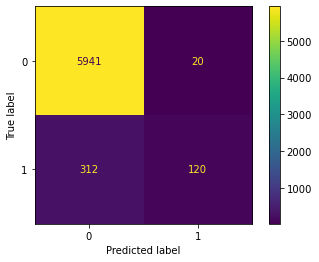

In [79]:
report(log_model)

In [80]:
f1_log_model=f1_score_model(log_model)

0.6098265895953758


# Decision Tree Model

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5961
           1       0.68      0.62      0.65       432

    accuracy                           0.95      6393
   macro avg       0.83      0.80      0.81      6393
weighted avg       0.95      0.95      0.95      6393



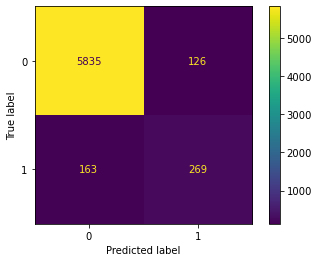

In [81]:
report(dt_model_grid)

In [82]:
f1_dt_model_grid=f1_score_model(dt_model_grid)

0.6497584541062802


# Random Forest Model

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5961
           1       0.91      0.60      0.72       432

    accuracy                           0.97      6393
   macro avg       0.94      0.80      0.85      6393
weighted avg       0.97      0.97      0.97      6393



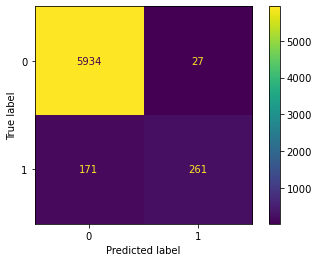

In [83]:
report(rf_model)

In [84]:
f1_rf_model=f1_score_model(rf_model)

0.7180667433831991


# Naive Bayes Model

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5961
           1       0.99      0.25      0.40       432

    accuracy                           0.95      6393
   macro avg       0.97      0.63      0.69      6393
weighted avg       0.95      0.95      0.93      6393



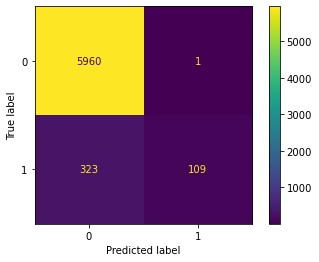

In [85]:
report(nb_model)

In [86]:
f1_nb_model=f1_score_model(nb_model)

0.5331179321486268


# Adaboost Model

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5961
           1       0.70      0.34      0.45       432

    accuracy                           0.95      6393
   macro avg       0.83      0.66      0.71      6393
weighted avg       0.94      0.95      0.94      6393



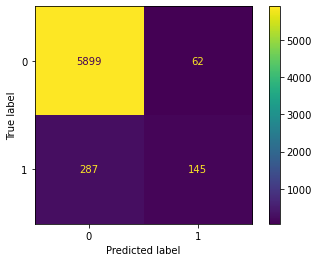

In [87]:
report(ada_model)

In [88]:
f1_ada_model=f1_score_model(ada_model)

0.1288782816229117


# Model Comparison

In [89]:
model=['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','Adaboost']

f1_scr=[f1_log_model,f1_dt_model_grid,f1_rf_model,f1_nb_model,f1_ada_model]

compare=pd.DataFrame({'Model':model,'f1_score':f1_scr},index=list(range(1,6)))

compare.head()

,Model,f1_score
1,Logistic Regression,0.609827
2,Decision Tree,0.649758
3,Random Forest,0.718067
4,Naive Bayes,0.533118
5,Adaboost,0.128878


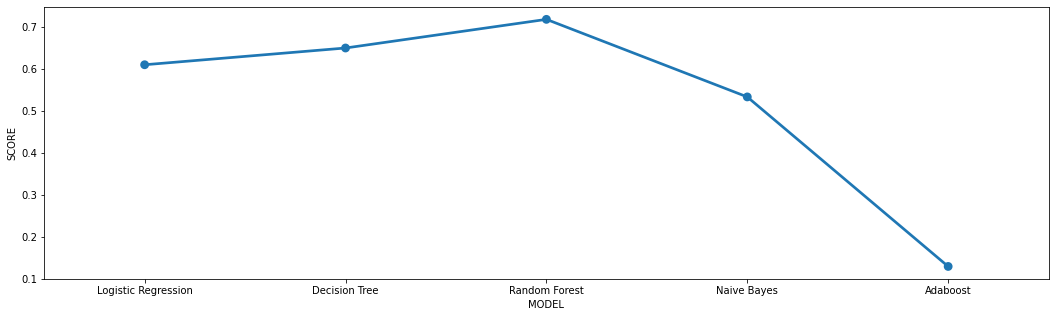

In [90]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='f1_score',data=compare)

plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

# Predicting the results for our test data

#### From the above comparison graph we can clearly see that the best possible F1 Score is obtained by the Random Forest Model using TF-IDF features.

In [91]:
test_data=tfidf_matrix[31962:]
test_preds=rf_model.predict(test_data)
test['label']=test_preds

submission=test[['id','label']]
submission.to_csv('results.csv',index=False)

In [92]:
res=pd.read_csv('results.csv')

In [93]:
res

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
